In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv('/content/mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [6]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [8]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [11]:
##spliting categorical and numerical column for encording:
cat_col = [i for i in df.columns if df[i].dtype=='O']
num_col = [i for i in df.columns if df[i].dtype!='O']
cat_col

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class']

In [12]:
num_col

['stalk_height', 'cap_diameter']

In [13]:
lb= LabelEncoder()

In [16]:
for i in cat_col:
  arr = lb.fit_transform(df[i])
  df[i] = arr

In [17]:
df[cat_col].head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


In [18]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [19]:
st = StandardScaler()
arr

array([1, 0, 1, ..., 1, 1, 1])

In [22]:
arr = st.fit_transform(df[num_col])
arr

array([[ 1.57645935, -1.03012304],
       [-1.21646308,  0.95840718],
       [ 0.16371736, -0.72490441],
       ...,
       [ 1.38218107, -0.14819255],
       [ 0.71519905, -0.55216407],
       [ 1.24916951,  1.24055562]])

In [23]:
df[num_col] = arr
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,1.576459,-1.030123
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,-1.216463,0.958407
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,0.163717,-0.724904
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,-0.871852,1.222967
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,1.511897,0.032765


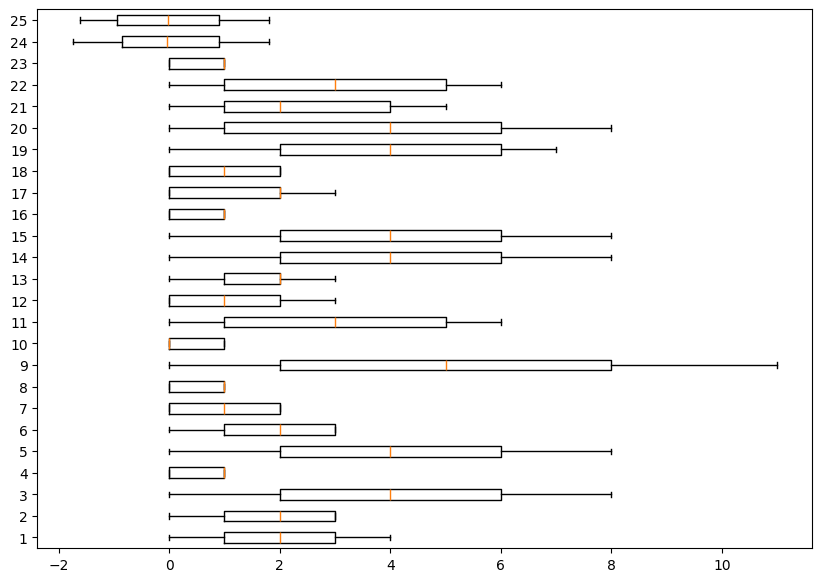

In [24]:
##Visualizations:
plt.figure(figsize=(10,7))
plt.boxplot(df, vert=False)
plt.show()

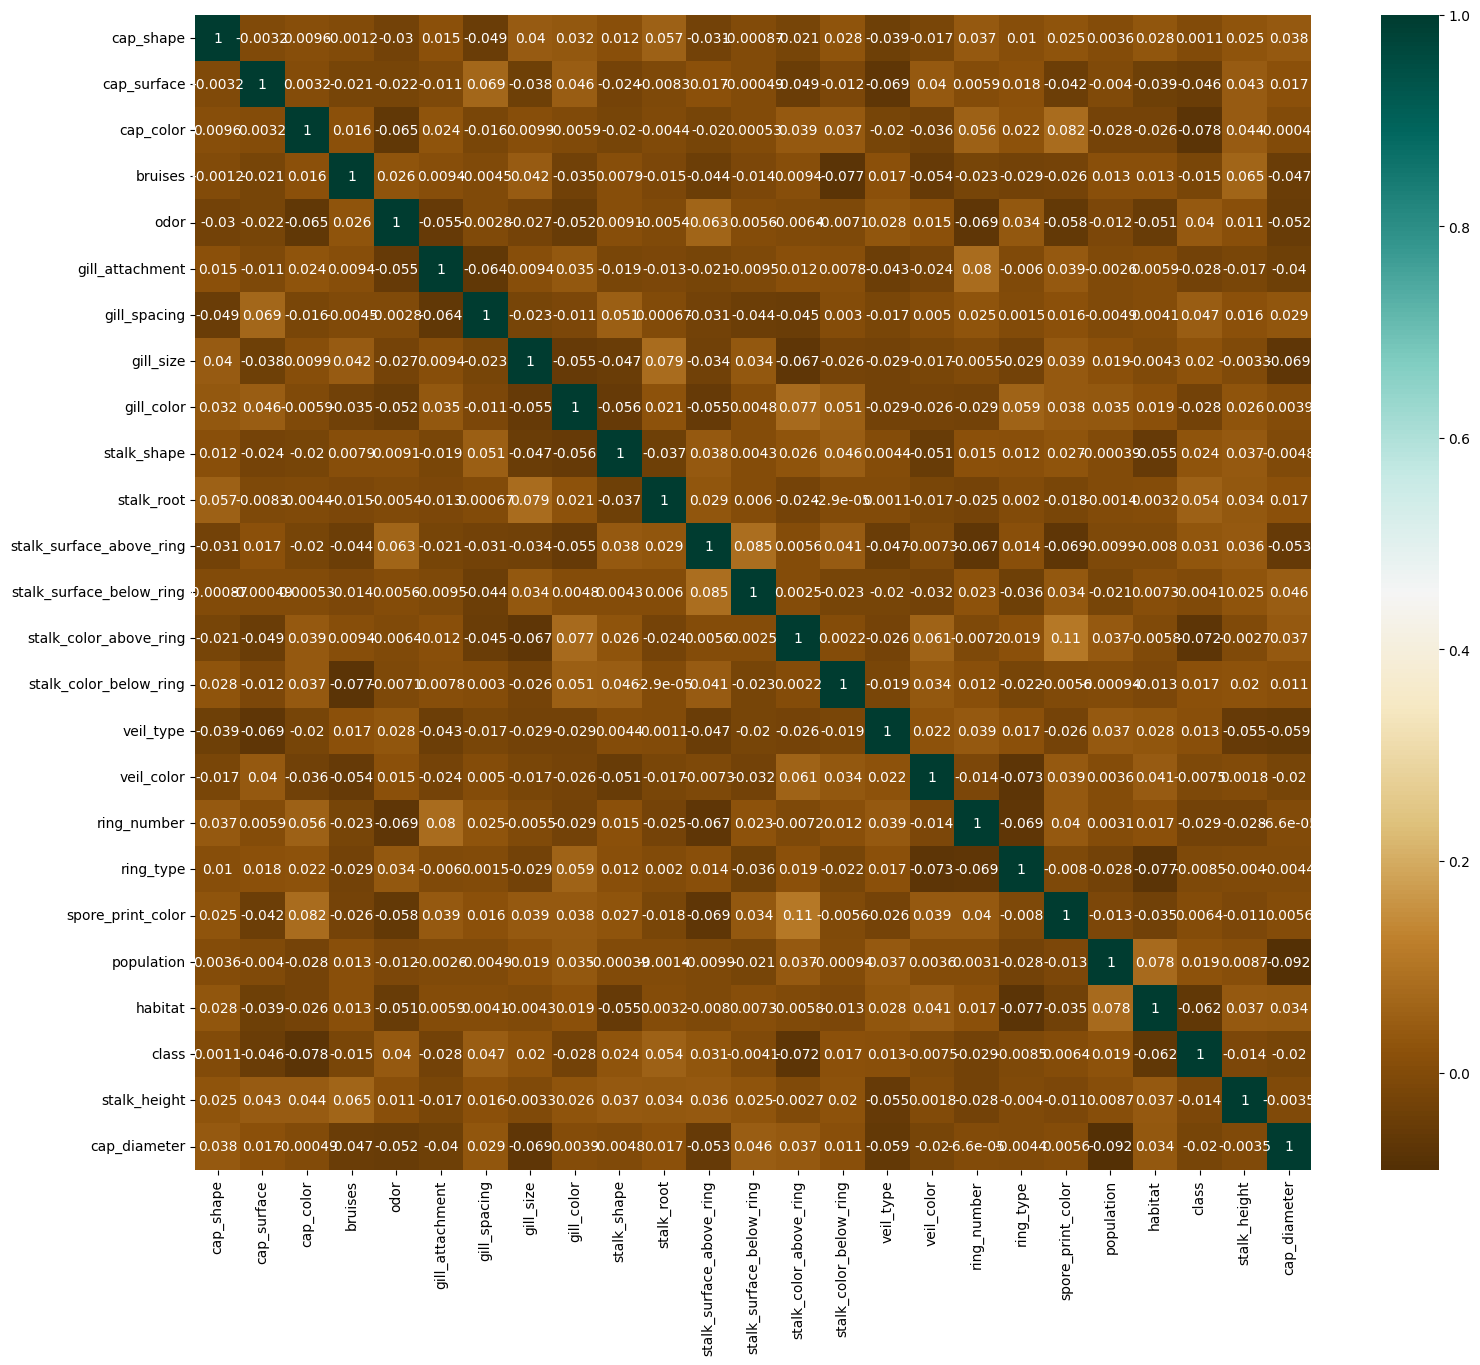

In [25]:
## Corelations:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.BrBG)
plt.show()

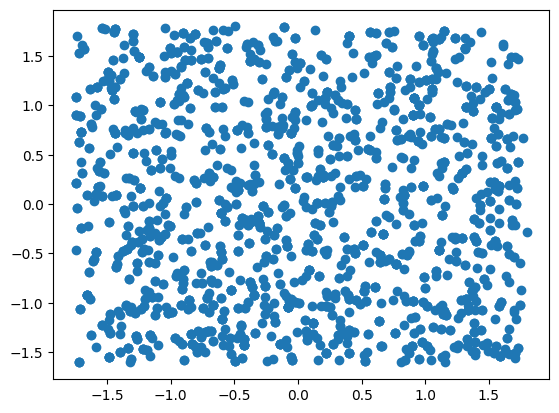

In [26]:
##Scatter plot:
plt.scatter(df[num_col].iloc[:,0], df[num_col].iloc[:,1])
plt.show()

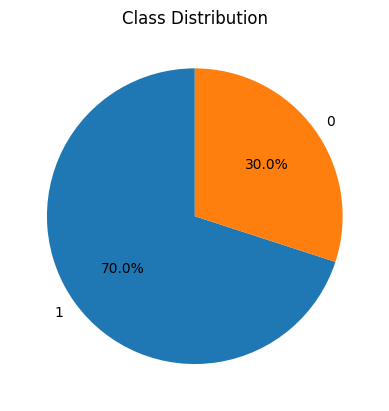

In [27]:
##Class distributions:
class_counts = df['class'].value_counts()
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=class_counts.index)
plt.title('Class Distribution')
plt.ylabel('')  # Remove y-label for better visualization
plt.show()

In [28]:
##Spliting data:
features = df.drop('class', axis=1)
target = df['class']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=100, test_size=0.2)

MODEL BUILD

In [30]:
svm = SVC(C=1, kernel='rbf', gamma=0.3)
svm.fit(x_train, y_train)

SVC(C=1, gamma=0.3)

In [31]:
##Prediction:
y_pred = svm.predict(x_test)

In [32]:
##Scores:
accuracy_score(y_test, y_pred)*100

85.75

In [33]:
precision_score(y_test, y_pred)*100

81.78913738019169

In [34]:
recall_score(y_test, y_pred)*100

100.0

In [35]:
f1_score(y_test, y_pred)*100

89.98242530755711

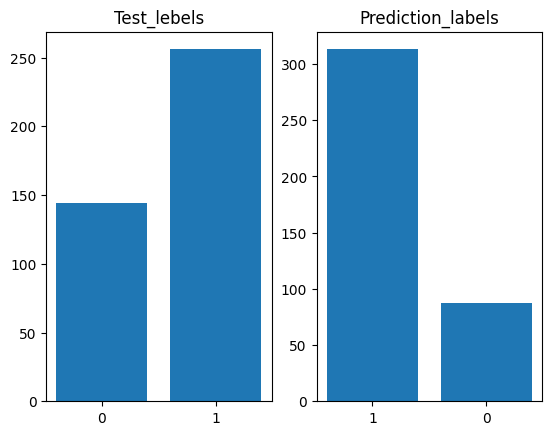

In [36]:
## Visualization of Svm result:
plt.subplot(1, 2, 1)
count_test = pd.Series(y_test).value_counts()
plt.bar(x=y_test.unique(), height=count_test)
plt.xticks(y_test.unique(), labels=[1, 0])
plt.title('Test_lebels')

plt.subplot(1, 2, 2)
count_test = pd.Series(y_pred).value_counts()
plt.bar(x=np.unique(y_pred), height=count_test)
plt.xticks(np.unique(y_pred), labels=[1, 0])
plt.title('Prediction_labels')

plt.show()

PARAMETER TUNING AND OPTIMIZATION

In [37]:
params = {'C':[2, 3, 4, 5], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'gamma':[0.2, 0.4, 0.5, 0.6]}

In [ ]:
gd = GridSearchCV(svm, params)
gd.fit(x_train, y_train)

In [ ]:
gd.best_params_

COMPARISON AND ANALYSIS

In [ ]:
svm1 = SVC(C=1, kernel='linear', gamma=0.3)
svm2 = SVC(C=1, kernel='poly', gamma=0.3)
svm3 = SVC(C=1, kernel='rbf', gamma=0.3)
svm4 = SVC(C=1, kernel='sigmoid', gamma=0.3)

In [ ]:
svm1.fit(x_train, y_train)
svm2.fit(x_train, y_train)
svm3.fit(x_train, y_train)
svm4.fit(x_train, y_train)

In [ ]:
y_pred1 = svm1.predict(x_test)
y_pred2 = svm2.predict(x_test)
y_pred3 = svm3.predict(x_test)
y_pred4 = svm4.predict(x_test)

In [ ]:
accuracy_1 = accuracy_score(y_test, y_pred1)
accuracy_2 = accuracy_score(y_test, y_pred2)
accuracy_3 = accuracy_score(y_test, y_pred3)
accuracy_4 = accuracy_score(y_test, y_pred4)

In [ ]:
## Visualization of all scores with different kernels:
labels = ['Linear', 'Poly', 'RBF', 'Sigmoid']
scores = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
plt.xlabel('Kernels')
plt.ylabel('Scores')

plt.bar(x=labels, height=scores)
plt.show()

SVM strengths :
i)Handles Non-linear Data.

ii)Effective in High-Dimensional Spaces.

iii)Robust to Outliers (with Soft Margin).

iv)Provides clear decision boundaries, which can be visualized in 2D or 3D for better interpretability in certain cases.

SVM weakness:

i)SVM does not inherently handle imbalanced datasets well without techniques like class weighting or oversampling.

ii)Less Effective for Large Datasets.

iii)The model stores support vectors, which can lead to high memory usage for large datasets.

iv)Requires Feature Scaling.

Practical implications of SVM:

i)Text Classification & Sentiment Analysis.

ii)Image Recognition.

iii)Used for cancer detection and other diagnostic tasks.

iv)Protein structure prediction, gene classification, and disease diagnosis.